# Modelling

In [24]:
# Importing Libraries
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from causalnex.structure import DAGClassifier
import pandas as pd
import numpy as np
import sys
import mlflow
# from IPython.display import display, Markdown
import matplotlib.pyplot as plt
from typing import Tuple


In [25]:
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=RuntimeWarning)
warnings.simplefilter(action='ignore', category=ConvergenceWarning)

In [26]:
# DataFrame Splitter
def split_dataframe(df: pd.DataFrame, percentage: float = 0.2) -> Tuple[pd.DataFrame, pd.DataFrame]:
    try:
        df_size = len(df)
        cut_size = df_size - int(df_size * (1 - percentage))
        train_df = df.iloc[:cut_size, :]
        test_df = df.iloc[cut_size:, :]

        return (train_df, test_df)

    except Exception as e:
        print('Failed to Split Dataframe to Train and Test Segments')
        sys.exit(1)


In [27]:
def separate_x_y(df: pd.DataFrame, target_index:int, start_index: int = 0) -> Tuple[pd.DataFrame, pd.DataFrame]:
    x = df.iloc[:, start_index:]
    y = df.iloc[:, target_index]

    return (x, y)


## Loading and Preparing The Dataset for training

### Dataset One

In [28]:
# Outliear Revalued Normalized Dataset
data_1 = pd.read_csv('../data/clean_out_removed_normalized.csv')
data_1_train, data_1_test = split_dataframe(data_1, percentage=0.8)

In [29]:
print("Total Data Size:\n\t\t",len(data_1))
print("Train Data Size:\n\t\t", len(data_1_train))
print("Test Data Size:\n\t\t", len(data_1_test))


Total Data Size:
		 569
Train Data Size:
		 456
Test Data Size:
		 113


In [30]:
data_1_train_x, data_1_train_y = separate_x_y(data_1_train, 1, 2)
data_1_test_x, data_1_test_y = separate_x_y(data_1_test, 1, 2)

### Dataset Two

In [49]:
# Feature Added Outliear Revalued Normalized Dataset
data_2 = pd.read_csv('../data/out_removed_std_scale_norm.csv')
data_2_train, data_2_test = split_dataframe(data_2, percentage=0.8)


In [50]:
print("Total Data Size:\n\t\t", len(data_2))
print("Train Data Size:\n\t\t", len(data_2_train))
print("Test Data Size:\n\t\t", len(data_2_test))


Total Data Size:
		 415
Train Data Size:
		 333
Test Data Size:
		 82


In [51]:
data_2_train_x, data_2_train_y = separate_x_y(data_2_train, 1, 2)
data_2_test_x, data_2_test_y = separate_x_y(data_2_test, 1, 2)


## Modelling Using all Feature

### Training on All Features Using Dataset One Using Simple Logistic Regression

In [41]:
names = data_1_train_x.columns.to_list()

mlflow.set_experiment('All Data Training')
mlflow.sklearn.autolog()
mlflow.set_tag('Data Path', '../data/clean_out_removed_normalized.csv')
lr_model_d1 = LogisticRegression()
scores = cross_val_score(lr_model_d1, data_1_train_x, data_1_train_y, cv=KFold(shuffle=True, random_state=42))
print(f'MEAN Score: {np.mean(scores).mean():.3f}')


MEAN Score: 0.783


In [42]:
lr_model_d1.fit(data_1_train_x, data_1_train_y)


LogisticRegression()

In [43]:
lr_model_d1.score(data_1_test_x, data_1_test_y)


0.8938053097345132

In [44]:
for i in range(lr_model_d1.coef_.shape[0]):
    print("MEAN EFFECT DIRECTIONAL CLASS {}:".format(i))
    print(pd.Series(lr_model_d1.coef_[i, :], index=names).sort_values(ascending=False))


MEAN EFFECT DIRECTIONAL CLASS 0:
area_worst                 4.075116
area_se                    0.698321
concavity_worst            0.006626
concavity_mean             0.003297
concave points_mean        0.001814
concave points_worst       0.001755
compactness_worst          0.001157
fractal_dimension_se      -0.000238
concave points_se         -0.000351
smoothness_se             -0.000532
compactness_se            -0.000796
concavity_se              -0.001006
compactness_mean          -0.001180
symmetry_se               -0.001461
fractal_dimension_mean    -0.004236
fractal_dimension_worst   -0.004458
smoothness_mean           -0.005553
radius_se                 -0.005823
smoothness_worst          -0.007054
symmetry_mean             -0.010752
symmetry_worst            -0.014787
perimeter_se              -0.034527
texture_se                -0.083292
radius_worst              -0.487523
radius_mean               -0.517956
texture_mean              -0.915501
texture_worst             -1.14

### Training on All Features Using Dataset Two Using Simple Logistic Regression

In [52]:
names = data_2_train_x.columns.to_list()

mlflow.set_experiment('All Data Training')
mlflow.sklearn.autolog()
mlflow.set_tag('Data Path', '../data/out_removed_std_scale_norm.csv')
lr_model_d2 = LogisticRegression()
scores = cross_val_score(lr_model_d2, data_2_train_x,
                         data_2_train_y, cv=KFold(shuffle=True, random_state=42))
print(f'MEAN Score: {np.mean(scores).mean():.3f}')


MEAN Score: 0.591


In [53]:
lr_model_d2.fit(data_2_train_x, data_2_train_y)


LogisticRegression()

In [54]:
lr_model_d2.score(data_2_test_x, data_2_test_y)


0.7560975609756098

In [55]:
for i in range(lr_model_d2.coef_.shape[0]):
    print("MEAN EFFECT DIRECTIONAL CLASS {}:".format(i))
    print(pd.Series(lr_model_d2.coef_[i, :],
                    index=names).sort_values(ascending=False))


MEAN EFFECT DIRECTIONAL CLASS 0:
symmetry_mean              0.789946
texture_mean               0.766947
perimeter_se               0.748641
smoothness_mean            0.615000
radius_se                  0.588480
concave points_mean        0.543643
area_se                    0.383619
compactness_mean           0.378863
fractal_dimension_worst    0.274300
concave points_worst       0.231851
fractal_dimension_se       0.203193
texture_worst              0.178622
fractal_dimension_mean     0.122330
perimeter_worst           -0.062279
symmetry_se               -0.101437
radius_worst              -0.106031
perimeter_mean            -0.124578
concavity_mean            -0.139831
radius_mean               -0.145300
area_worst                -0.162308
symmetry_worst            -0.165771
area_mean                 -0.234269
compactness_worst         -0.266497
smoothness_se             -0.322942
compactness_se            -0.326059
smoothness_worst          -0.348495
concave points_se         -0.36

## Training on Selected Features

In [56]:
# Declaring Training Used Features Retrieved from CausalInference SCM Graphs
features = ['radius_mean',
            'perimeter_mean',
            'compactness_mean',
            'concavity_mean',
            'concave points_mean',
            'symmetry_mean',
            'texture_se',
            'perimeter_se',
            'area_se',
            'radius_worst',
            'texture_worst',
            'perimeter_worst',
            'area_worst',
            'smoothness_worst',
            'compactness_worst',
            'concavity_worst',
            'concave points_worst',
            'symmetry_worst',
            'fractal_dimension_worst']


In [57]:
# Selecting Features from Dataset One
data_1_train_x_feat = data_1_train_x[features]
data_1_test_x_feat = data_1_test_x[features]
data_2_train_x_feat = data_2_train_x[features]
data_2_test_x_feat = data_2_test_x[features]

### Training on Selected Features Using Dataset One Using Simple Logistic Regression

In [58]:
names = data_1_train_x_feat.columns.to_list()

mlflow.set_experiment('Selected Features Training')
mlflow.sklearn.autolog()
mlflow.set_tag('Data Path', '../data/clean_out_removed_normalized.csv')
lr_model_d1_feat = LogisticRegression()
scores = cross_val_score(lr_model_d1_feat, data_1_train_x_feat,
                         data_1_train_y, cv=KFold(shuffle=True, random_state=42))
print(f'MEAN Score: {np.mean(scores).mean():.3f}')


INFO: 'Selected Features Training' does not exist. Creating a new experiment
MEAN Score: 0.702


In [59]:
lr_model_d1_feat.fit(data_1_train_x_feat, data_1_train_y)


LogisticRegression()

In [61]:
lr_model_d1_feat.score(data_1_test_x_feat, data_1_test_y)


0.8672566371681416

### Training on Selected Features Using Dataset Two Using Simple Logistic Regression

In [62]:
names = data_2_train_x_feat.columns.to_list()

mlflow.set_experiment('Selected Features Training')
mlflow.sklearn.autolog()
mlflow.set_tag('Data Path', '../data/out_removed_std_scale_norm.csv')
lr_model_d2_feat = LogisticRegression()
scores = cross_val_score(lr_model_d2_feat, data_2_train_x_feat,
                         data_2_train_y, cv=KFold(shuffle=True, random_state=42))
print(f'MEAN Score: {np.mean(scores).mean():.3f}')


C:\Users\milky\Envs\causalnex\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


MEAN Score: 0.592


In [63]:
lr_model_d2_feat.fit(data_2_train_x_feat, data_2_train_y)


LogisticRegression()

In [64]:
lr_model_d2_feat.score(data_2_test_x_feat, data_2_test_y)


0.8170731707317073

> ## Both Logistic Regressions Trained on different Datasets Saw Emprovements when trained on the Causality Referenced Features

## Using DAG CLASSIFER to Do both training and feature choosing together

### Training on All Features Using Dataset One Using DAG Classifier

In [65]:
mlflow.set_experiment('DAG Classifier Training')
mlflow.sklearn.autolog(disable=True)
mlflow.autolog()
dag_model_d1 = DAGClassifier(
    alpha=0.1,
    beta=0.9,
    hidden_layer_units=[5],
    fit_intercept=True,
    standardize=True
)
scores = cross_val_score(dag_model_d1, data_1_train_x,
                         data_1_train_y, cv=KFold(shuffle=True, random_state=42))
print(f'MEAN Score: {np.mean(scores).mean():.3f}')


INFO: 'DAG Classifier Training' does not exist. Creating a new experiment
MEAN Score: 0.971


In [66]:
dag_model_d1.fit(data_1_train_x, data_1_train_y)


DAGClassifier(alpha=0.1, beta=0.9, hidden_layer_units=[5], standardize=True,
              target_dist_type='bin')

In [67]:
dag_model_d1.score(data_1_test_x, data_1_test_y)

0.9911504424778761

> ## DAG produced the highest score than all the other models.

In [70]:
names = data_1_train_x.columns.to_list()
for i in range(dag_model_d1.coef_.shape[0]):
    print("MEAN EFFECT DIRECTIONAL CLASS {}:".format(i))
    print(pd.Series(dag_model_d1.coef_[i, :],
                    index=names).sort_values(ascending=False))


MEAN EFFECT DIRECTIONAL CLASS 0:
texture_worst              0.561893
area_se                    0.473271
smoothness_se              0.444755
concave points_worst       0.441562
concave points_mean        0.386230
texture_mean               0.379340
concavity_mean             0.281573
smoothness_worst           0.249198
area_worst                 0.238187
concavity_worst            0.234485
symmetry_worst             0.183501
symmetry_se                0.080995
concave points_se          0.019083
compactness_worst          0.002239
fractal_dimension_worst    0.000005
perimeter_se              -0.038570
compactness_mean          -0.098186
symmetry_mean             -0.193771
compactness_se            -0.203595
fractal_dimension_se      -0.214447
area_mean                 -0.250583
radius_se                 -0.253355
texture_se                -0.273413
concavity_se              -0.286975
smoothness_mean           -0.362128
fractal_dimension_mean    -0.388415
perimeter_worst           -0.45

(<Figure size 991.44x977.04 with 1 Axes>, <AxesSubplot:>)

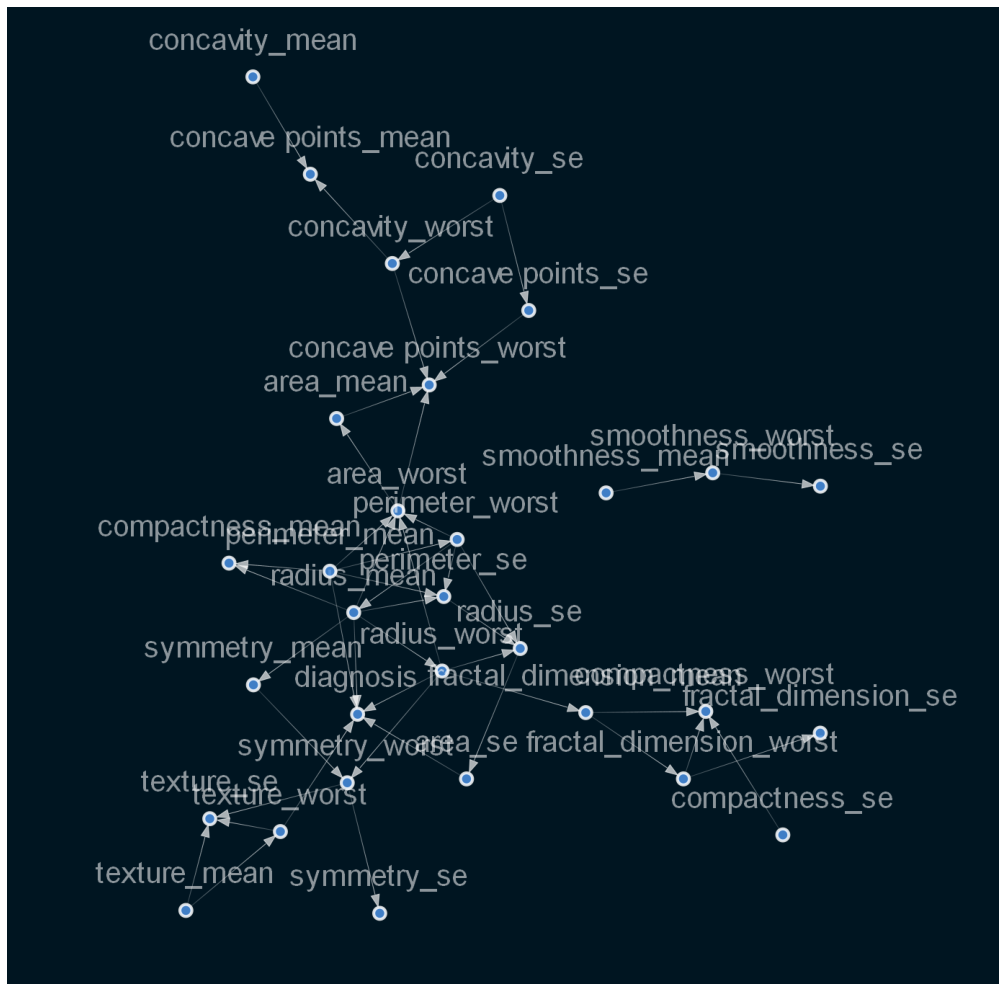

In [71]:
dag_model_d1.plot_dag(enforce_dag=True)